# Problem Statement

The problem is to predict the Price of Diamond using given Dataset.This classic dataset contains the prices and other attributes of almost 54,000 diamonds.

Description of parameters are :

- price: price in US dollars (\$326--\$18,823) <br><br>

- carat: weight of the diamond (0.2--5.01) <br><br>

- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal) <br><br>

- color: diamond colour, from J (worst) to D (best) <br><br>

- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) <br><br>

- x: length in mm (0--10.74) <br><br>

- y: width in mm (0--58.9) <br><br>

- z: depth in mm (0--31.8) <br><br>

- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) <br><br>

- table: width of top of diamond relative to widest point (43--95) <br><br>

# Solution :

Importing Libraries :

- pandas : for handling dataframes. <br><br>

- numpy : for handling numpy objects.<br><br>


- matplotlib.pyplot : for visualising dataset.<br><br>

- seaborn : for visualising correlations amongst features.<br><br>

- statsmodels.api : for implementing Backward Elimination.<br><br>

- train_test_split : for splitting training and testing datasets.<br><br>

- StandardScaler : for rescaling the dataset.<br><br>

- mean_squared_error, min_absolute_score, r2_score : for evaluating the model.<br><br>

- LinearRegression : for model fitting.<br><br>

- SVR : for model fitting.<br><br>

- RandomForestRegressor : for modelfitting.<br><br>

- PCA : to avoid overfitting

# 1. Importing Libraries

In [1]:
# IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as smf
from sklearn.ensemble import RandomForestRegressor 
from sklearn.svm import SVR
from sklearn.decomposition import PCA
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Importing the Dataset

In [2]:
# IMPORTING THE DATASET
df = pd.read_csv('diamonds.csv')

# 2. Data Handling

###### Data Handling refers to the process of gathering, recording and presenting information in a way that is helpful to others - for instance, in graphs or charts.


### 2.1 Getting sense of the data

In [4]:
# TO SEE FIRST FIVE ROWS OF DATASET
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# TO SEE LAST FIVE ROWS OF DATASET
df.tail(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


There are roughly 54,000 examples of diamonds, each with 11 qualities. One of the columns looks like an extra index. We'll drop this column.

In [3]:
# DROPPING THE PARAMETER "Unnamed: 0"
df= df.drop(["Unnamed: 0"],axis=1)

In [4]:
# TO SEE DATA TYPE, NUMBER OF NOT NULL OF EACH PARAMETER AND BASIC INFORMATON ABOUT THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### Column descriptions

 - carat: The weight of the diamond, equivalent to 200mg (should be a good indicator)

-  cut: Quality of the cut

- color: Color of the diamond from J to D (worst to best)

-  clarity: How clear the diamond is; I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

- depth: Total depth percentage (relative to x and y). Will likely be collinear.

- table: Width of top of diamond relative to widest point (43--95)

- price: In US dollars ($)

- x, y, z: Dimensions of the diamond

### 2.2 Univariate and Bivariate Data Exploration

##### Data Exploration is used to get insights from data. A good data exploration strategy is a key to solve any complicated problem in the world of Machine Learning. <br>
- Univariate Analysis - It is used to visualize one variable in one plot. Examples: histogram, density plot, etc.<br>

- Bivariate Analysis - It is used to visualize two variables (x and y axis) in one plot. Examples: bar chart, line chart, area chart, etc.

Quantitative Data Description

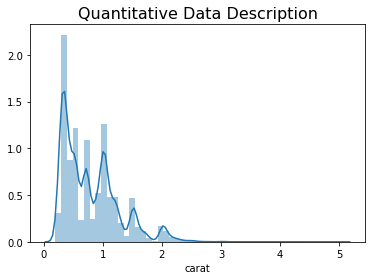

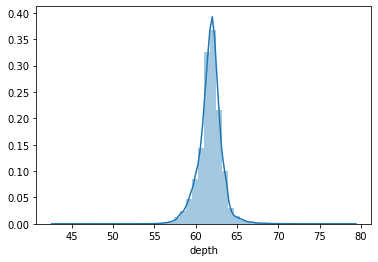

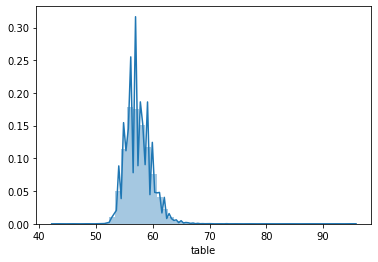

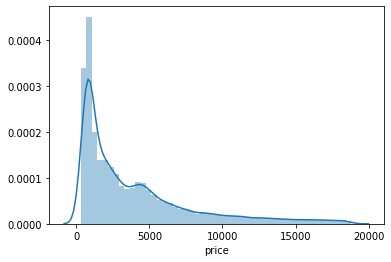

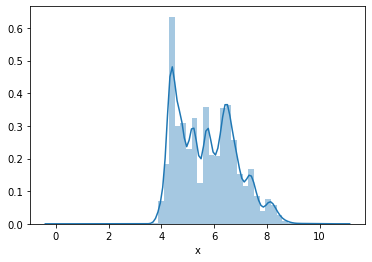

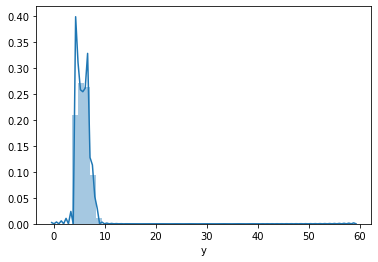

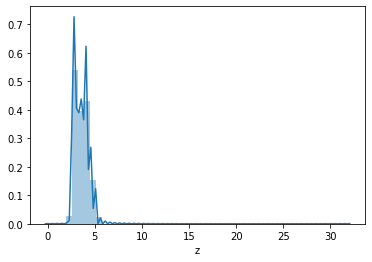

In [5]:
# TO PLOT THE GRAPHS OF NUMERICAL VALUE FOR ANALYSIS
def plotgraph(col):
    sns.distplot(col)
    plt.show()
plt.title("Quantitative Data Description",size=16)    
plotgraph(df['carat'])
plotgraph(df['depth'])
plotgraph(df['table'])
plotgraph(df['price'])
plotgraph(df['x'])
plotgraph(df['y'])
plotgraph(df['z'])

##### Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

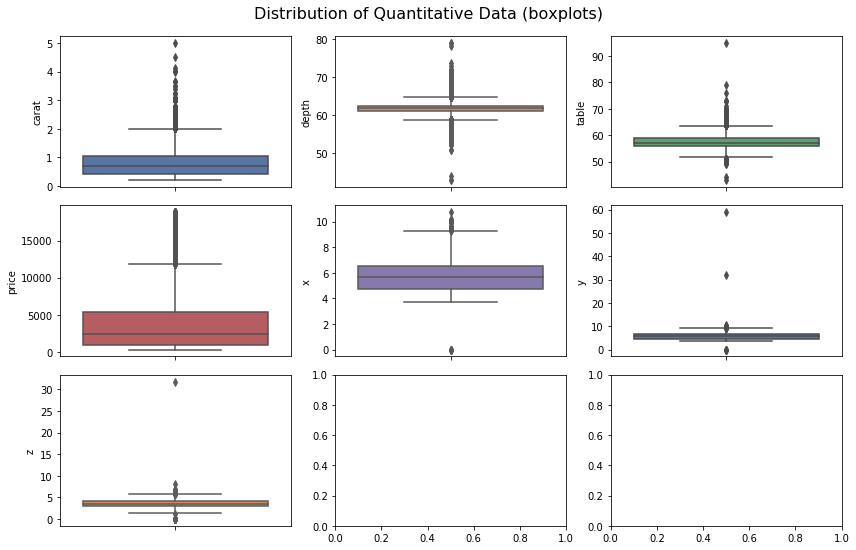

In [6]:
# TO PLOT THE BOXPLOTS TO SEE DISTRIBUTION OF QUANTITATVE DATA
colors = sns.color_palette("deep")
fig,axes = plt.subplots(3,3, figsize = (12,8)) # up to 9 quant vars
sns.boxplot(y= df["carat"], color = colors[0], ax = axes[0,0])
sns.boxplot(y = df["depth"], color = colors[1], ax = axes[0,1])
sns.boxplot(y = df["table"], color = colors[2], ax = axes[0,2])
sns.boxplot(y = df["price"], color = colors[3], ax = axes[1,0])
sns.boxplot(y = df["x"], color = colors[4], ax = axes[1,1])
sns.boxplot(y = df["y"], color = colors[0], ax = axes[1,2])
sns.boxplot(y = df["z"], color = colors[1], ax = axes[2,0])
plt.suptitle("Distribution of Quantitative Data (boxplots)", size = 16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Observation

The distribution of carat,depth, table, y, and z all have long tails. There is a particular value in  z  that looks like an error or extreme outlier, and there are other outliers we can explore too.

##### A pairs plot allows us to see both distribution of single variables and relationships between two variables. 

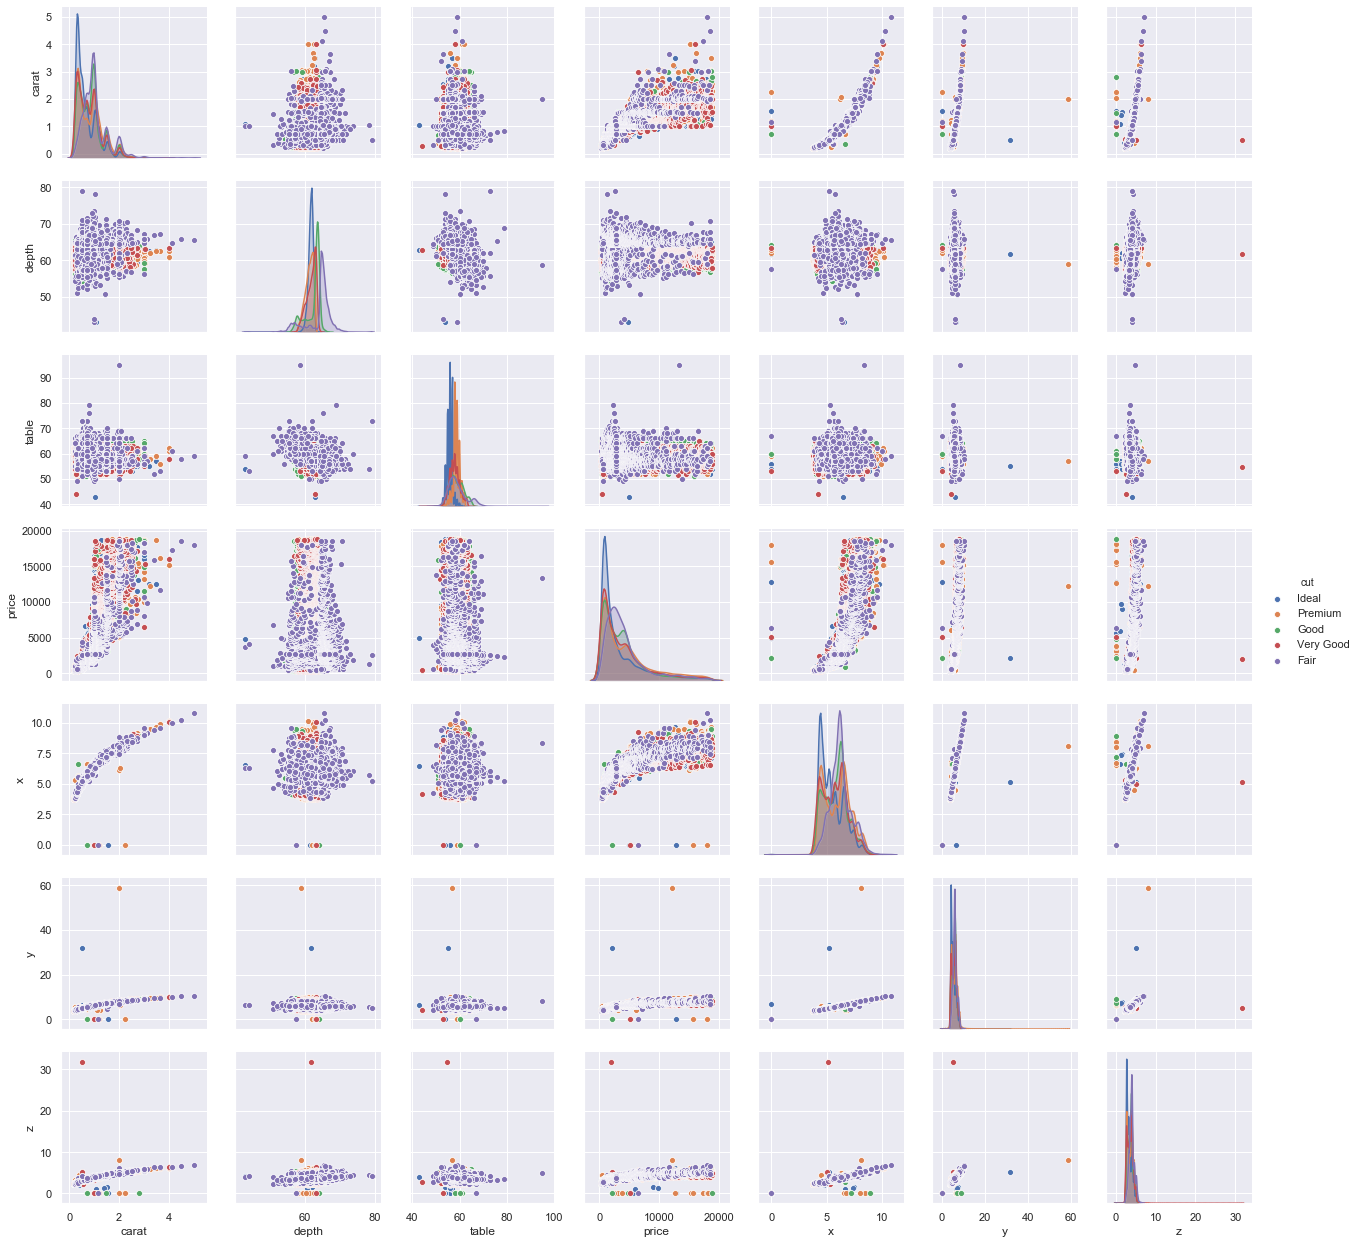

In [10]:
# TO PLOT THE PAIRPLOTS TO SEE RELATIONSHIP BETWEEN THE PARAMETERS
sns.set()
sns.pairplot(df,hue='cut', size = 2.5)
plt.show();

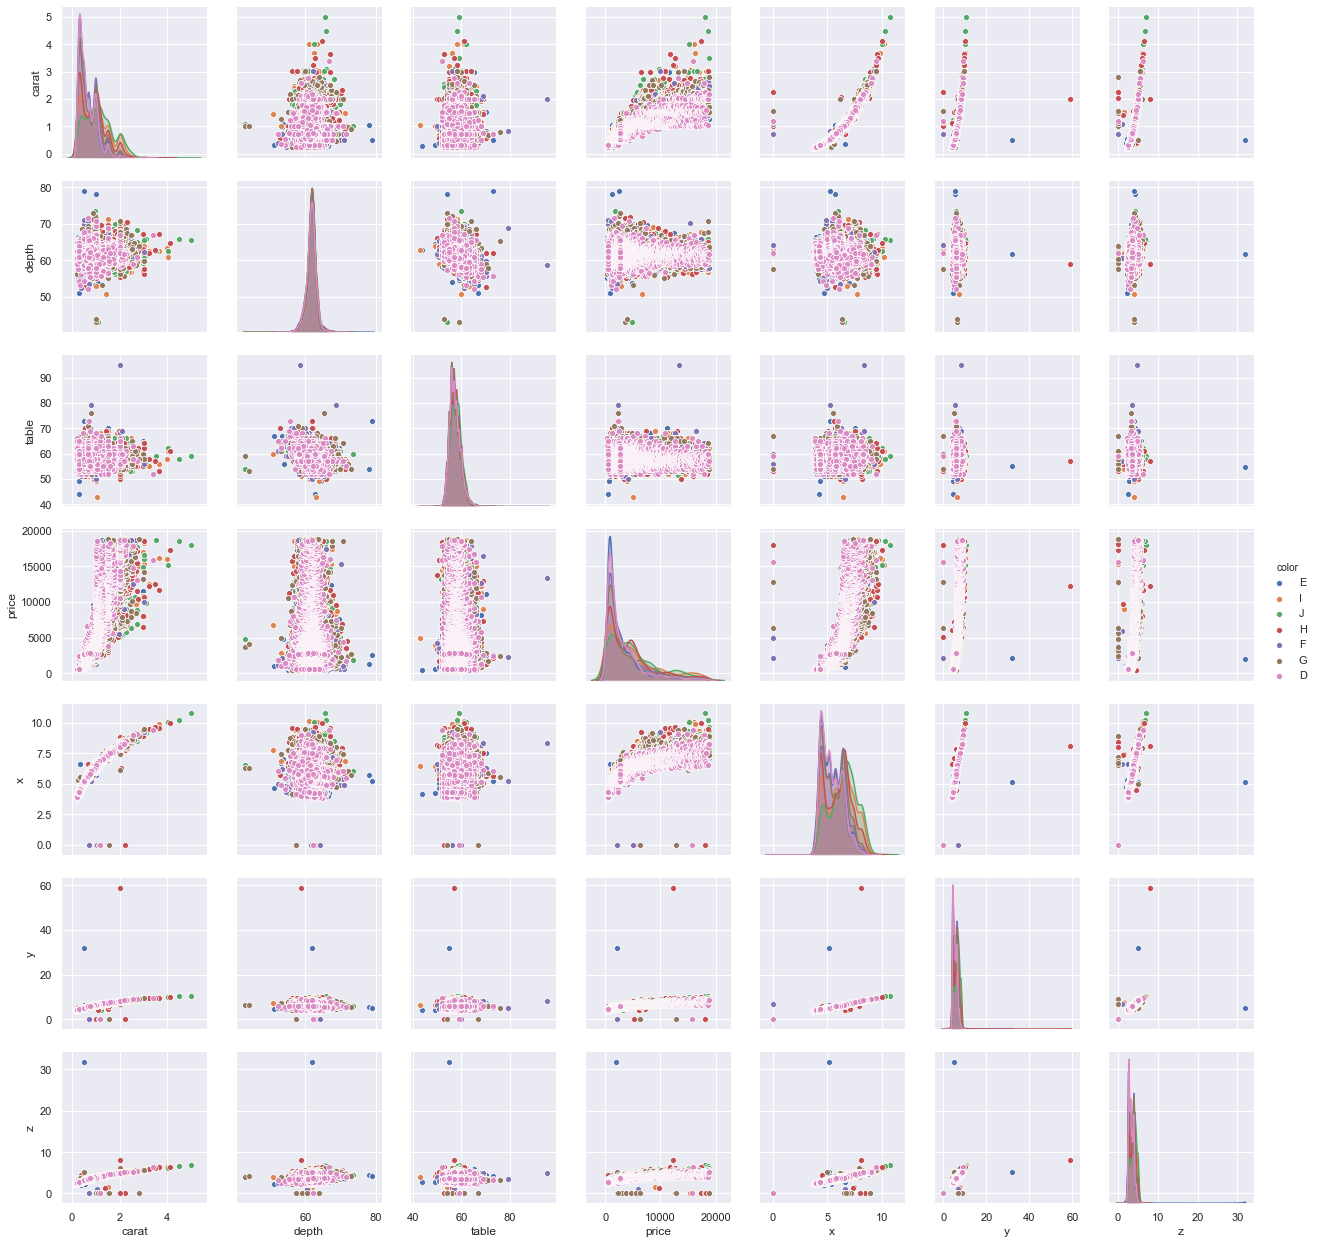

In [11]:
# TO PLOT THE PAIRPLOTS TO SEE RELATIONSHIP BETWEEN THE PARAMETERS
sns.set()
sns.set()
sns.pairplot(df,hue='color', size = 2.5)
plt.show();

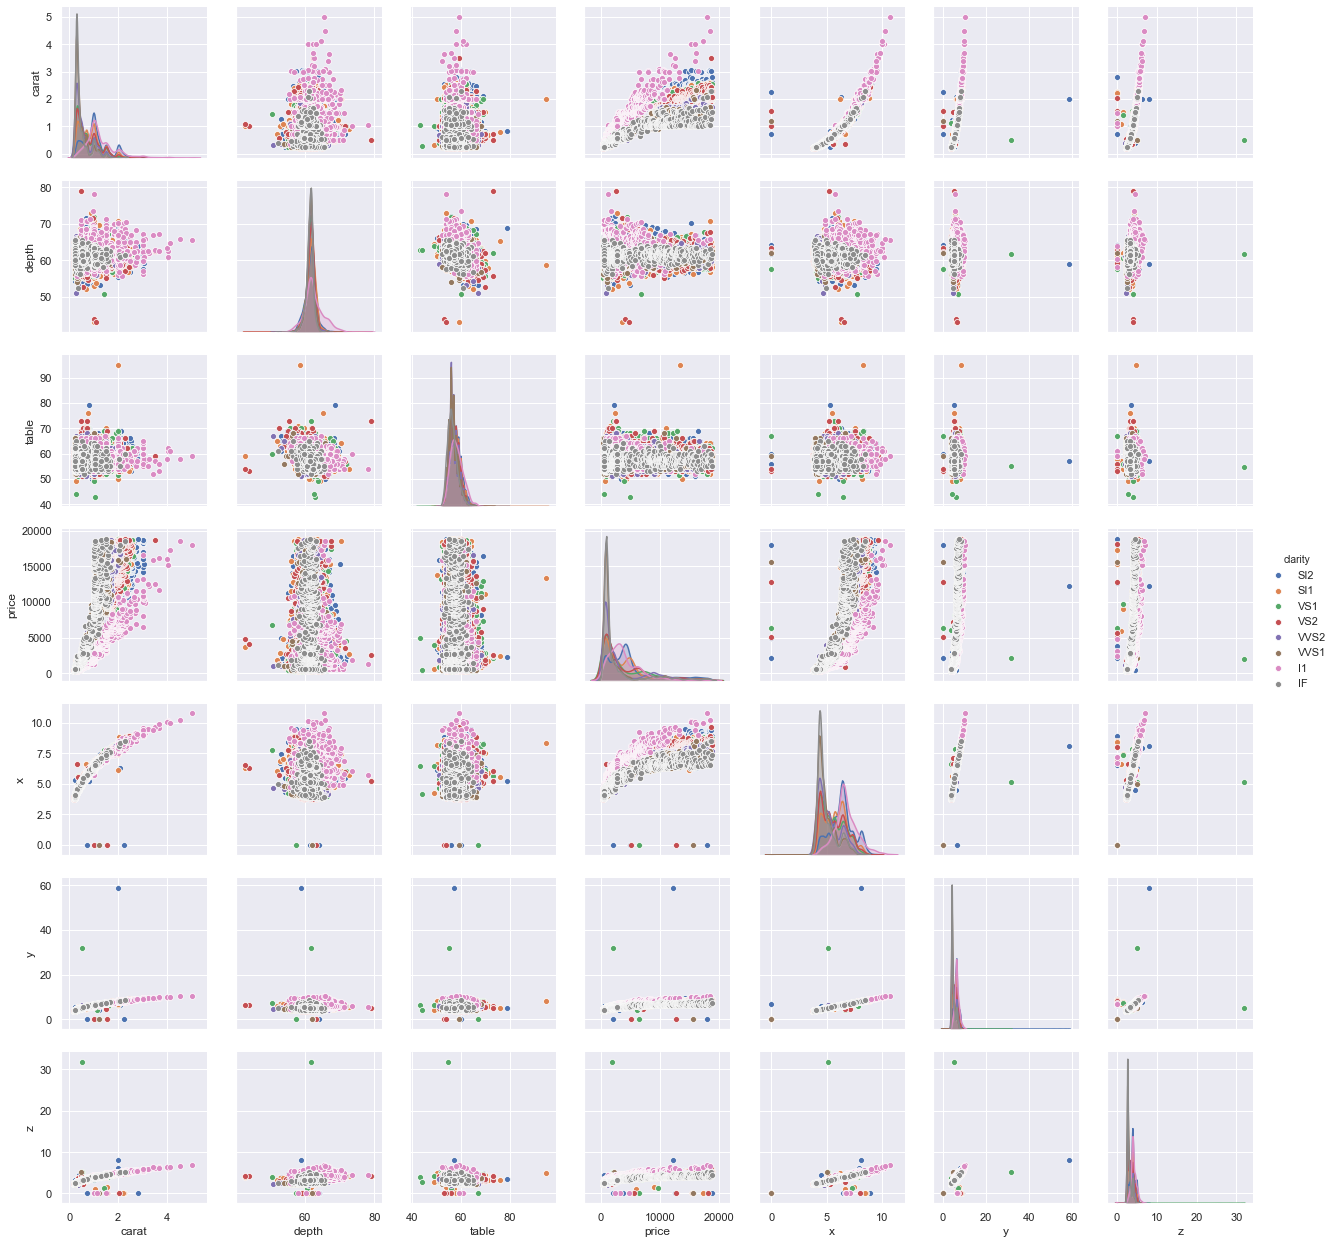

In [12]:
# TO PLOT THE PAIRPLOTS TO SEE RELATIONSHIP BETWEEN THE PARAMETERS
sns.set()
sns.set()
sns.pairplot(df,hue='clarity', size = 2.5)
plt.show();

### Observation

It looks like price is skewed right, so we should log transform it for better predictions. There aren't any clear predictors here, so we will have to experiment to find best combinations. There's also a pretty obvious outlier that we should investigate further.

It also looks like  x,y,z is related to the carat of the diamond and x,y,z are also related to each other, so these might cause a collinearity issue. We will check the correlation matrix just to be certain.

##### Correlation is used to describe the linear relationship between two continuous variables

Using heatmap from seaborn library to visualize correlations amongst different variables.

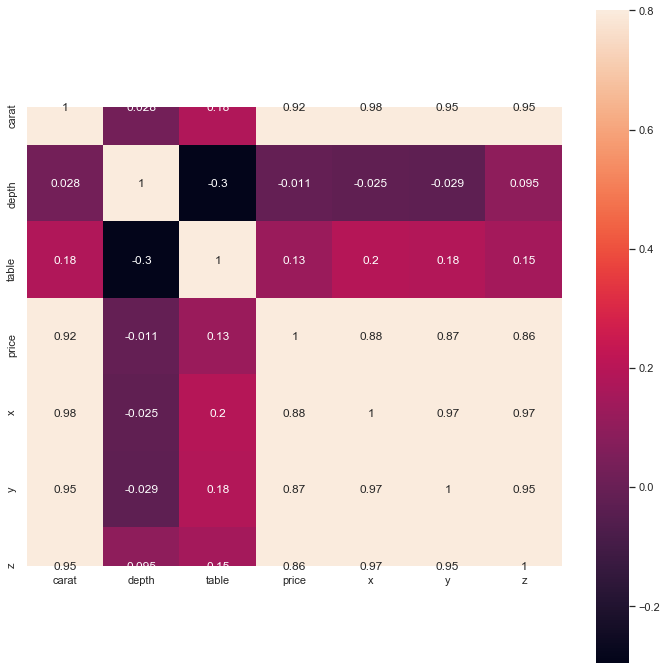

In [12]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, annot=True,square=True);

We can observe that dark colored cells are very less correlated with corresponding features and light colored cells are highly correlated with the corresponding features.


### Observation


Price is strongly dependent on x,y,z 

Price is strongly dependent on carat

Price is less effected by tale

Price is very less effeted by the depth

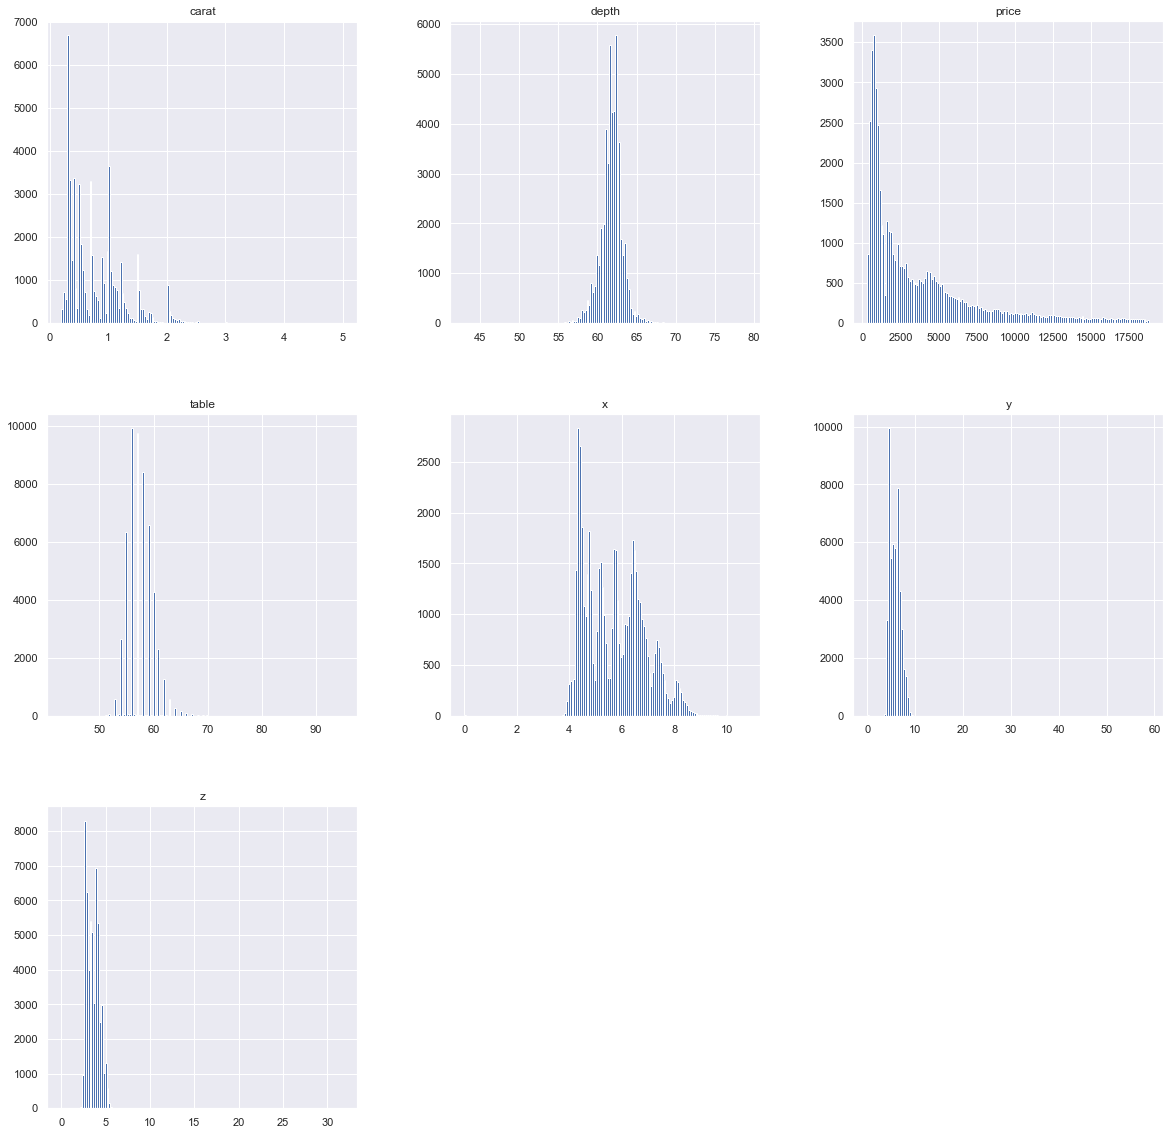

In [13]:
# TO PLOT HISTOGRAM
p = df.hist(figsize = (20,20),bins=150)

In [32]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [33]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Observation

As x,y, z are length, width and depth of the diamond respectively.So, it should be a non zero value. But, in dataset minimum value is 0 while depth is non zero whichis not possible. It means these are some missing values in x,y,z wich is denoted by 0.

## 2.3 Missing Values

In [49]:
# TO COUNT THE NUMBER OF MISSING VALUES IN x,y,z PARAMETER
print("Number of rows with x == 0: {} ".format((df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((df.depth==0).sum()))


Number of rows with x == 0: 8 
Number of rows with y == 0: 7 
Number of rows with z == 0: 20 
Number of rows with depth == 0: 0 


In [50]:
#diamonds that are probably errors
zero_df = df[(df['x'] == 0) |
           (df['y'] == 0) |
           (df['z'] == 0)]

In [51]:
zero_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0


In [52]:
# TO REPLACE 0 WITH NaN 
df[['x','y','z']] = df[['x','y','z']].replace(0,np.NaN)

In [53]:
# TO FIND NUMBER OF MISSING VALUES
zero_df.shape

(20, 10)

There are only 20 missing values since the dataset is big enough dropping 20 rows shouldn't cost us much hence the nans have been dropped. 

In [54]:
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [55]:
# TO DROP MISSING VALUES
df.dropna(inplace=True)

In [56]:
df.shape

(53920, 10)

## 2.4 Categorical Data Essense

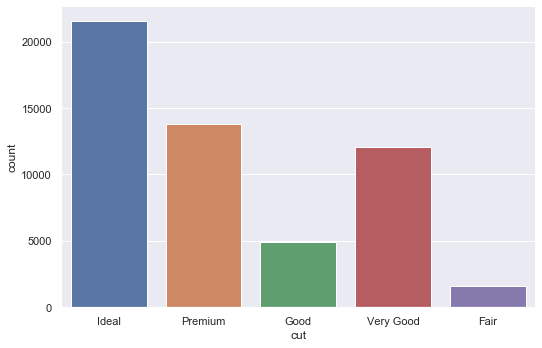

In [15]:
# TO PLOT COUNT OF EACH CATEGORICAL VALUE IN COUNT PARAMETER
p = sns.factorplot(x='cut', data=df , kind='count',aspect=1.5 )

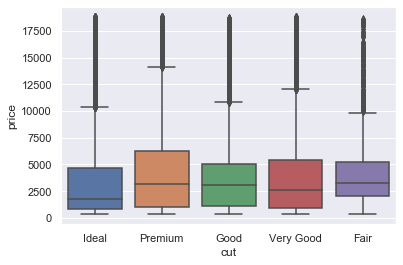

In [58]:
# TO PLOT BOXPLOT OF CUT PARAMETER
sns.boxplot(x='cut',y='price', data = df)

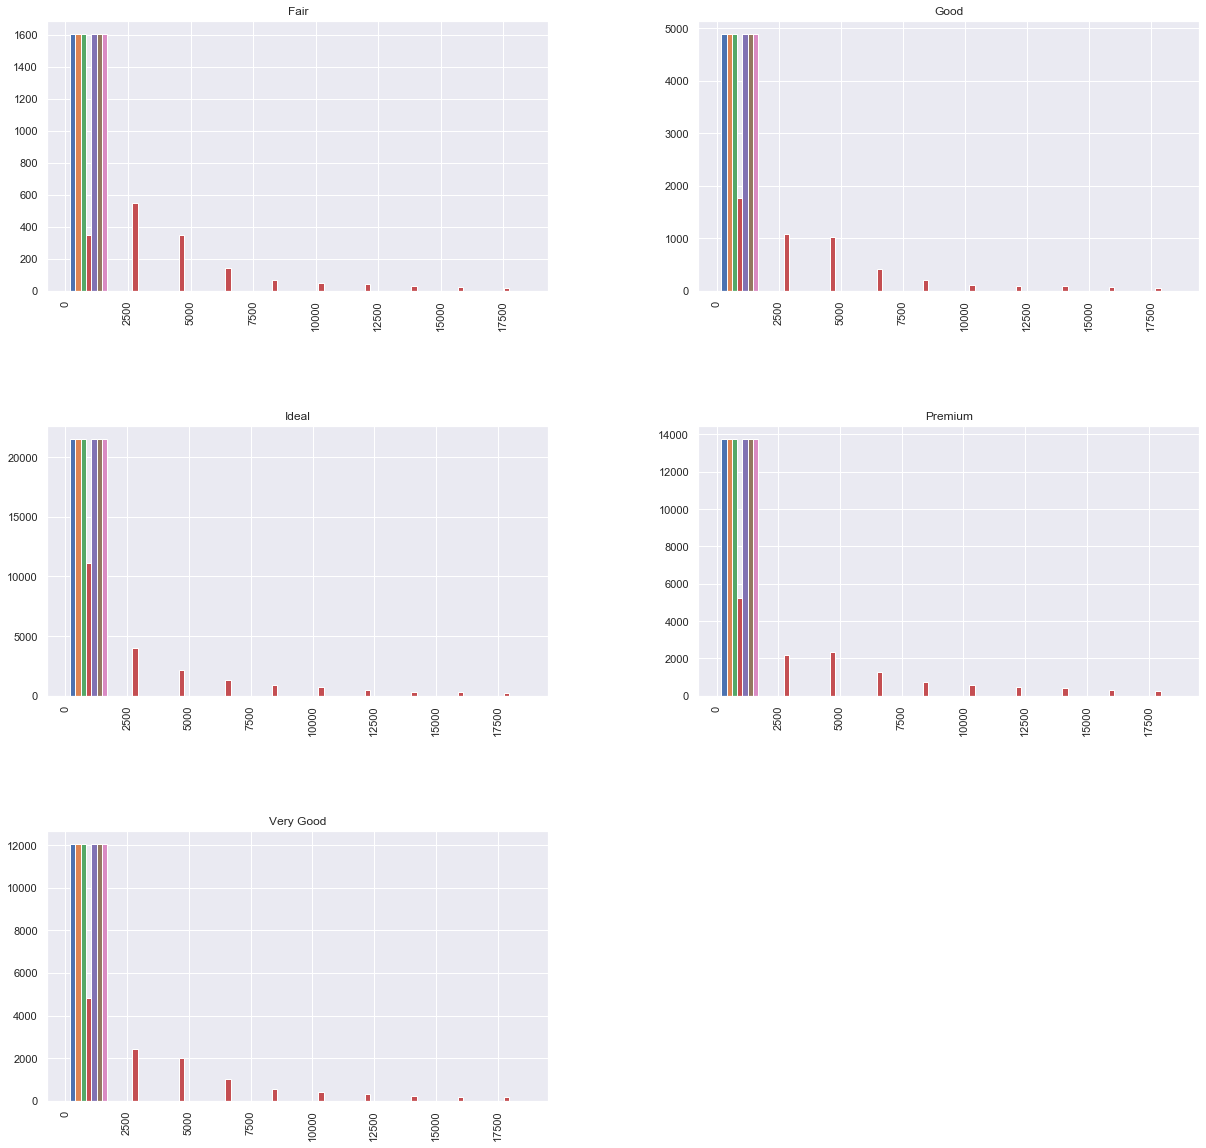

In [59]:
# TO PLOT HISTOGRAM
p = df.hist(figsize = (20,20), by=df.cut,grid=True)

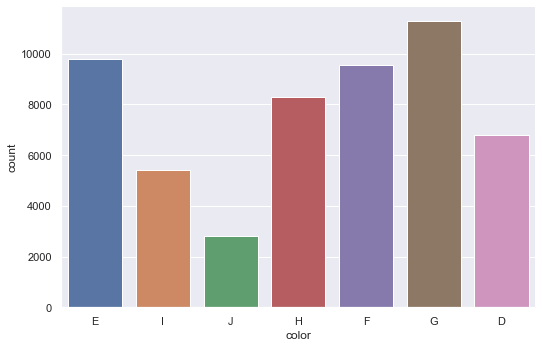

In [60]:
# TO PLOT COUNT OF EACH CATEGORICAL VALUE IN COLOR PARAMETER
p = sns.factorplot(x='color', data=df , kind='count',aspect=1.5 )

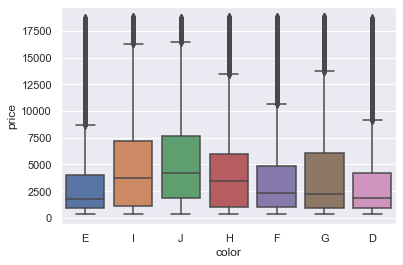

In [16]:
# TO PLOT BOXPLOT OF COLOR PARAMETER
sns.boxplot(x='color',y='price', data = df)

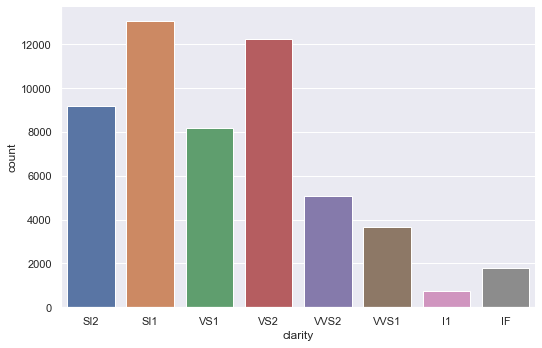

In [62]:
# TO PLOT COUNT OF EACH CATEGORICAL VALUE IN CLARITY PARAMETER
p = sns.factorplot(x='clarity', data=df , kind='count',aspect=1.5 )

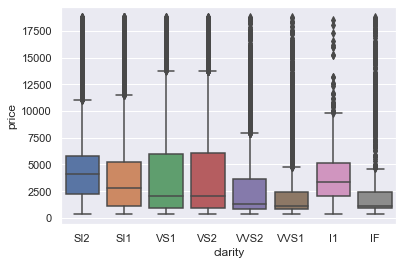

In [63]:
# TO PLOT BOXPLOT OF CLARITY PARAMETER
sns.boxplot(x='clarity',y='price', data = df)

### Observation

Mostly the median prices are very low as compared to the the highest price values for all the categories in colors, cut and clarity. The upper quartile is bigger. It shows that whichever category it may be there's a variety of diamonds that are still very expensive.

For example in the cut category, be it ideal, premium or any other type, there are diamonds in those categories with high prices.

##### Regression model does not take strings so we have to convert strings into numerical value

In [64]:
# ONE HOT ENCODING
one_hot_encoders_diamond =  pd.get_dummies(df)
one_hot_encoders_diamond.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [65]:
# TO TAKE INFORMATION ABOUT THE DATASET AFTER ENCODING
one_hot_encoders_diamond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 27 columns):
carat            53920 non-null float64
depth            53920 non-null float64
table            53920 non-null float64
price            53920 non-null int64
x                53920 non-null float64
y                53920 non-null float64
z                53920 non-null float64
cut_Fair         53920 non-null uint8
cut_Good         53920 non-null uint8
cut_Ideal        53920 non-null uint8
cut_Premium      53920 non-null uint8
cut_Very Good    53920 non-null uint8
color_D          53920 non-null uint8
color_E          53920 non-null uint8
color_F          53920 non-null uint8
color_G          53920 non-null uint8
color_H          53920 non-null uint8
color_I          53920 non-null uint8
color_J          53920 non-null uint8
clarity_I1       53920 non-null uint8
clarity_IF       53920 non-null uint8
clarity_SI1      53920 non-null uint8
clarity_SI2      53920 non-null uint8
clari

##### To Remove Dummy Variables Trap 

In [66]:
# TO SELECT PARAMETERS TO REMOVE DUMMY TRAP
cols=['carat','depth','table', 'price','x','y','z','cut_Fair','cut_Good','cut_Ideal','cut_Premium','color_I','clarity_I1',
      'clarity_IF','clarity_SI1','clarity_SI2','clarity_VS1','clarity_VS2','clarity_VVS1']

In [147]:
# TO CONVERT THE ARRAY INTO DATAFRAME
diamond_clean=pd.DataFrame(one_hot_encoders_diamond,columns= cols)

In [70]:
diamond_clean.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,color_I,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0,0,0,0,1,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0,0,0,1,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0,0,0,1,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,1,0,0,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0,0,0,0,1,0,0,0


In [71]:
diamond_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 19 columns):
carat           53920 non-null float64
depth           53920 non-null float64
table           53920 non-null float64
price           53920 non-null int64
x               53920 non-null float64
y               53920 non-null float64
z               53920 non-null float64
cut_Fair        53920 non-null uint8
cut_Good        53920 non-null uint8
cut_Ideal       53920 non-null uint8
cut_Premium     53920 non-null uint8
color_I         53920 non-null uint8
clarity_I1      53920 non-null uint8
clarity_IF      53920 non-null uint8
clarity_SI1     53920 non-null uint8
clarity_SI2     53920 non-null uint8
clarity_VS1     53920 non-null uint8
clarity_VS2     53920 non-null uint8
clarity_VVS1    53920 non-null uint8
dtypes: float64(6), int64(1), uint8(12)
memory usage: 6.4 MB


## 2.5 Data Scaling

In [149]:
# TO SCALE THE DATASET
sc_X = StandardScaler()
scaled_data=sc_X.fit_transform(diamond_clean)

In [75]:
scaled_data = pd.DataFrame(scaled_data)
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.198204,-0.174203,-1.099725,-0.904132,-1.591573,-1.539219,-1.580084,-0.175381,-0.316234,1.225692,-0.585917,-0.334328,-0.1178,-0.185303,-0.565442,2.206908,-0.422586,-0.542311,-0.269617
1,-1.240417,-1.361090,1.585988,-0.904132,-1.645173,-1.662014,-1.750896,-0.175381,-0.316234,-0.815866,1.706727,-0.334328,-0.1178,-0.185303,1.768527,-0.453123,-0.422586,-0.542311,-0.269617
2,-1.198204,-3.385781,3.376463,-0.903881,-1.502241,-1.460280,-1.750896,-0.175381,3.162213,-0.815866,-0.585917,-0.334328,-0.1178,-0.185303,-0.565442,-0.453123,2.366380,-0.542311,-0.269617
3,-1.071566,0.454149,0.243131,-0.902125,-1.368242,-1.319943,-1.295396,-0.175381,-0.316234,-0.815866,1.706727,2.991071,-0.1178,-0.185303,-0.565442,-0.453123,-0.422586,1.843962,-0.269617
4,-1.029353,1.082501,0.243131,-0.901875,-1.243176,-1.214690,-1.124583,-0.175381,3.162213,-0.815866,-0.585917,-0.334328,-0.1178,-0.185303,-0.565442,2.206908,-0.422586,-0.542311,-0.269617


In [76]:
scaled_data.columns=['carat','depth','table', 'price','x','y','z','cut_Fair','cut_Good','cut_Ideal','cut_Premium','color_I','clarity_I1',
      'clarity_IF','clarity_SI1','clarity_SI2','clarity_VS1','clarity_VS2','clarity_VVS1']

In [77]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53920 entries, 0 to 53919
Data columns (total 19 columns):
carat           53920 non-null float64
depth           53920 non-null float64
table           53920 non-null float64
price           53920 non-null float64
x               53920 non-null float64
y               53920 non-null float64
z               53920 non-null float64
cut_Fair        53920 non-null float64
cut_Good        53920 non-null float64
cut_Ideal       53920 non-null float64
cut_Premium     53920 non-null float64
color_I         53920 non-null float64
clarity_I1      53920 non-null float64
clarity_IF      53920 non-null float64
clarity_SI1     53920 non-null float64
clarity_SI2     53920 non-null float64
clarity_VS1     53920 non-null float64
clarity_VS2     53920 non-null float64
clarity_VVS1    53920 non-null float64
dtypes: float64(19)
memory usage: 7.8 MB


In [78]:
scaled_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,color_I,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1
0,-1.198204,-0.174203,-1.099725,-0.904132,-1.591573,-1.539219,-1.580084,-0.175381,-0.316234,1.225692,-0.585917,-0.334328,-0.1178,-0.185303,-0.565442,2.206908,-0.422586,-0.542311,-0.269617
1,-1.240417,-1.361090,1.585988,-0.904132,-1.645173,-1.662014,-1.750896,-0.175381,-0.316234,-0.815866,1.706727,-0.334328,-0.1178,-0.185303,1.768527,-0.453123,-0.422586,-0.542311,-0.269617
2,-1.198204,-3.385781,3.376463,-0.903881,-1.502241,-1.460280,-1.750896,-0.175381,3.162213,-0.815866,-0.585917,-0.334328,-0.1178,-0.185303,-0.565442,-0.453123,2.366380,-0.542311,-0.269617
3,-1.071566,0.454149,0.243131,-0.902125,-1.368242,-1.319943,-1.295396,-0.175381,-0.316234,-0.815866,1.706727,2.991071,-0.1178,-0.185303,-0.565442,-0.453123,-0.422586,1.843962,-0.269617
4,-1.029353,1.082501,0.243131,-0.901875,-1.243176,-1.214690,-1.124583,-0.175381,3.162213,-0.815866,-0.585917,-0.334328,-0.1178,-0.185303,-0.565442,2.206908,-0.422586,-0.542311,-0.269617


In [80]:
# SELECTING INPUT PARAMETERS AND OUTPUT PARAMETERS TO TRAING THE MODEL
x = scaled_data.drop(["price"],axis=1)
y = scaled_data.price

# 3. Splitting the Data into Training set and test set

In [87]:
# TO SPLIT THE DATSET INTO TRAINING SET AND TEST SET 
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 2,test_size=0.3)

# 4. Models Used

## 4.1 Linear Regression

Using Linear Regression model to fit the training dataset.

In [88]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test) 

In [89]:
print("Regression score: "+ str(regressor.score(x_test,y_test)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test ,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test ,y_pred)))
R2 = r2_score(y_test,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

Regression score: 90.4934532366522%
Mean absolute error: 0.19519426989732536
Mean squared error: 0.09382667164504241
R Squared: 0.904934532366522
Adjusted R Squared: 0.9048345129984214


## 4.2 Ridge Regression

Using Ridge Regression to fit the training dataset.

In [91]:
rig_regressor = linear_model.Ridge()
rig_regressor.fit(x_train,y_train)
y_pred = rig_regressor.predict(x_test)
print("Ridge Regression score: "+ str(rig_regressor.score(x_test,y_test)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 90.49307988383457%
Mean absolute error: 0.19522158781614388
Mean squared error: 0.09383035652169633
R Squared: 0.9049307988383457
Adjusted R Squared: 0.9048307755421613


## 4.3 Lasso Regression

Using Lasso Regression to fit the training dataset.

In [93]:
las_regressor = linear_model.Lasso()
las_regressor.fit(x_train,y_train)
y_pred = las_regressor.predict(x_test)
print("Lasso Regression Score: "+ str(las_regressor.score(x_test,y_test)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

Lasso Regression Score: -0.00026391040253148645%
Mean absolute error: 0.7566071008103377
Mean squared error: 0.9869716270174578
R Squared: -2.6391040253148645e-06
Adjusted R Squared: -0.0010547522903583406


##  4.4 Multiple Regression with Backward Elimination 

#### Significance Value =0.05

In [134]:
l = list(range(0,len(scaled_data.columns)))

Here we are using OLS Regression from statsmodels.api library to select features based on P value. 

For more information about p value please refer : https://www.investopedia.com/terms/p/p-value.asp
        
In general we can set a threshold value of p value as 5% ie 0.05. Any feature with p value less than 0.05 should be retained and the features with p values greater than 0.005 must be rejected. This process should be sequential one ie. first the feature with highest p value should be removed then model should be tested again and in the next turn the other feature with largest p value should be rejected and so on until all features are having p values less than the threshold value.

In [135]:
X = np.append(arr = np.ones((scaled_data.shape[0], 1)).astype(int), values = scaled_data.drop(['price'],axis=1).values, axis = 1)
X_opt = X[:, l]
regressor_ols = smf.OLS(endog = scaled_data.price, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 2.826e+04
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:47:54   Log-Likelihood:                -13274.
No. Observations:               53920   AIC:                         2.659e+04
Df Residuals:                   53901   BIC:                         2.675e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.776e-16      0.001  -2.08e-13      1.000      -0.003       0.003
x1             1.2982      0.007    194.669      0.000       1.285       1.311
x2            -0.0276      0.002    -15.116      0.000      -0.031      -0.024
x3            -0.0155      0.002     -8.703      0.000      -0.019      -0.012
x4            -0.2777      0.011    -25.851      0.000      -0.299      -0.257
x5             0.0075      0.006      1.235      0.217      -0.004       0.019
x6            -0.0176      0.007     -2.409      0.016      -0.032      -0.003
x7            -0.0305      0.002    -20.290      0.000      -0.033      -0.028
x8            -0.0099      0.002     -6.423      0.000      -0.013      -0.007
x9             0.0137      0.002      7.157      0.000       0.010       0.017
x10            0.0020      0.002      1.191      0.234      -0.001       0.005
x11           -0.0656      0.001    -48.388      0.000      -0.068      -0.063
x12           -0.1424      0.001    -97.436      0.000      -0.145      -0.140
x13            0.0123      0.002      8.058      0.000       0.009       0.015
x14           -0.1369      0.002    -60.971      0.000      -0.141      -0.133
x15           -0.2027      0.002    -95.119      0.000      -0.207      -0.199
x16           -0.0403      0.002    -20.189      0.000      -0.044      -0.036
x17           -0.0721      0.002    -32.974      0.000      -0.076      -0.068
x18           -0.0005      0.002     -0.291      0.771      -0.004       0.003
==============================================================================
Omnibus:                    14229.643   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           380914.026
Skew:                           0.685   Prob(JB):                         0.00
Kurtosis:                      15.949   Cond. No.                         19.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### x18 has p value =0.771 > 0.005 (Significance Level)  so we will remove this

In [136]:
l.pop(18)
X = np.append(arr = np.ones((scaled_data.shape[0], 1)).astype(int), values = scaled_data.drop(['price'],axis=1).values, axis = 1)
X_opt = X[:, l]
regressor_ols = smf.OLS(endog = scaled_data.price, exog = X_opt).fit()
regressor_ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 2.993e+04
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:47:58   Log-Likelihood:                -13274.
No. Observations:               53920   AIC:                         2.658e+04
Df Residuals:                   53902   BIC:                         2.674e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.776e-16      0.001  -2.08e-13      1.000      -0.003       0.003
x1             1.2981      0.007    194.743      0.000       1.285       1.311
x2            -0.0276      0.002    -15.114      0.000      -0.031      -0.024
x3            -0.0155      0.002     -8.702      0.000      -0.019      -0.012
x4            -0.2776      0.011    -25.852      0.000      -0.299      -0.257
x5             0.0075      0.006      1.235      0.217      -0.004       0.019
x6            -0.0176      0.007     -2.409      0.016      -0.032      -0.003
x7            -0.0305      0.002    -20.290      0.000      -0.033      -0.028
x8            -0.0099      0.002     -6.424      0.000      -0.013      -0.007
x9             0.0137      0.002      7.153      0.000       0.010       0.017
x10            0.0020      0.002      1.188      0.235      -0.001       0.005
x11           -0.0656      0.001    -48.406      0.000      -0.068      -0.063
x12           -0.1423      0.001    -99.694      0.000      -0.145      -0.139
x13            0.0125      0.001      8.649      0.000       0.010       0.015
x14           -0.1366      0.002    -71.436      0.000      -0.140      -0.133
x15           -0.2024      0.002   -108.237      0.000      -0.206      -0.199
x16           -0.0400      0.002    -23.139      0.000      -0.043      -0.037
x17           -0.0718      0.002    -38.741      0.000      -0.075      -0.068
==============================================================================
Omnibus:                    14228.110   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           380788.064
Skew:                           0.685   Prob(JB):                         0.00
Kurtosis:                      15.947   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### x10 has p value =0.235 > 0.005  (Significance Level) so we will rmove this

In [137]:
l.pop(10)
X = np.append(arr = np.ones((scaled_data.shape[0], 1)).astype(int), values = scaled_data.drop(['price'],axis=1).values, axis = 1)
X_opt = X[:, l]
regressor_ols = smf.OLS(endog = scaled_data.price, exog = X_opt).fit()
regressor_ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 3.180e+04
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:48:19   Log-Likelihood:                -13274.
No. Observations:               53920   AIC:                         2.658e+04
Df Residuals:                   53903   BIC:                         2.673e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.776e-16      0.001  -2.08e-13      1.000      -0.003       0.003
x1             1.2981      0.007    194.739      0.000       1.285       1.311
x2            -0.0277      0.002    -15.212      0.000      -0.031      -0.024
x3            -0.0153      0.002     -8.632      0.000      -0.019      -0.012
x4            -0.2767      0.011    -25.835      0.000      -0.298      -0.256
x5             0.0070      0.006      1.155      0.248      -0.005       0.019
x6            -0.0179      0.007     -2.461      0.014      -0.032      -0.004
x7            -0.0309      0.001    -21.093      0.000      -0.034      -0.028
x8            -0.0106      0.001     -7.439      0.000      -0.013      -0.008
x9             0.0126      0.002      7.506      0.000       0.009       0.016
x10           -0.0656      0.001    -48.408      0.000      -0.068      -0.063
x11           -0.1422      0.001    -99.706      0.000      -0.145      -0.139
x12            0.0125      0.001      8.663      0.000       0.010       0.015
x13           -0.1365      0.002    -71.430      0.000      -0.140      -0.133
x14           -0.2023      0.002   -108.280      0.000      -0.206      -0.199
x15           -0.0400      0.002    -23.114      0.000      -0.043      -0.037
x16           -0.0717      0.002    -38.727      0.000      -0.075      -0.068
==============================================================================
Omnibus:                    14231.428   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           380533.598
Skew:                           0.685   Prob(JB):                         0.00
Kurtosis:                      15.942   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### x5 has p value =0.248 > 0.005  (Significance Level) so we will remove this

In [138]:
l.pop(5)
X = np.append(arr = np.ones((scaled_data.shape[0], 1)).astype(int), values = scaled_data.drop(['price'],axis=1).values, axis = 1)
X_opt = X[:, l]
regressor_ols = smf.OLS(endog = scaled_data.price, exog = X_opt).fit()
regressor_ols.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 3.392e+04
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        12:48:34   Log-Likelihood:                -13275.
No. Observations:               53920   AIC:                         2.658e+04
Df Residuals:                   53904   BIC:                         2.672e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.776e-16      0.001  -2.08e-13      1.000      -0.003       0.003
x1             1.2983      0.007    194.795      0.000       1.285       1.311
x2            -0.0279      0.002    -15.388      0.000      -0.031      -0.024
x3            -0.0154      0.002     -8.662      0.000      -0.019      -0.012
x4            -0.2712      0.010    -28.228      0.000      -0.290      -0.252
x5            -0.0167      0.007     -2.312      0.021      -0.031      -0.003
x6            -0.0309      0.001    -21.129      0.000      -0.034      -0.028
x7            -0.0105      0.001     -7.417      0.000      -0.013      -0.008
x8             0.0126      0.002      7.512      0.000       0.009       0.016
x9            -0.0656      0.001    -48.410      0.000      -0.068      -0.063
x10           -0.1423      0.001    -99.739      0.000      -0.145      -0.139
x11            0.0125      0.001      8.665      0.000       0.010       0.015
x12           -0.1365      0.002    -71.438      0.000      -0.140      -0.133
x13           -0.2023      0.002   -108.289      0.000      -0.206      -0.199
x14           -0.0400      0.002    -23.115      0.000      -0.043      -0.037
x15           -0.0717      0.002    -38.738      0.000      -0.075      -0.068
==============================================================================
Omnibus:                    14228.721   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           380835.153
Skew:                           0.685   Prob(JB):                         0.00
Kurtosis:                      15.947   Cond. No.                         16.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Every Features have p value less than significance Level 0.05

We can observe that in P>|t| column, no value is greater than the set threshold value. Hence all features are relevant and reducing the number of features will only reduce the model's performance.

## 4.5 SVM

Using Support Vector Regression to fit the training dataset.

In [150]:
regressor = SVR()
regressor.fit(x_train, y_train)
y_pred =regressor.predict(x_test)
print("SVM score: "+ str(regressor.score(x_test,y_test)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test ,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test ,y_pred)))
R2 = r2_score(y_test,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

SVM score: 94.095607676593%
Mean absolute error: 0.13069960732713368
Mean squared error: 0.058274523187295195
R Squared: 0.9409560767659301
Adjusted R Squared: 0.9408939560396657


## 4.6 Random Forest Regressor

Using Random Forest Regression to fit the training dataset.

In [151]:
regressor = RandomForestRegressor(n_estimators = 25, random_state = 0)
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
print("Random Forest Regressor score: "+ str(regressor.score(x_test,y_test)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test ,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test ,y_pred)))
R2 = r2_score(y_test,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

Random Forest Regressor score: 94.38044134300141%
Mean absolute error: 0.11961727715797538
Mean squared error: 0.055463303134752846
R Squared: 0.9438044134300141
Adjusted R Squared: 0.9437452894684044


## 4.7 PCA

Principal Component Analysis (PCA) is used to explain the variance-covariance structure of a set of variables through linear combinations. It is often used as a dimensionality-reduction technique.

In [152]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x_train)
x_train=pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[0.23840402 0.10489899 0.08239403 0.07211747 0.0686763  0.06477608
 0.06297611 0.05775926 0.05539678 0.05240293]


when component is 10 then is giving good results

#### 4.7.1 Linear Regression

In [153]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)
y_pred =  regressor.predict(x_test)
print("Linear Regression score: "+ str(regressor.score(x_test,y_test)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test ,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test ,y_pred)))
R2 = r2_score(y_test,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

 Linear Regression score: 79.39948104880308%
Mean absolute error: 0.32662568976619216
Mean squared error: 0.20332074048208332
R Squared: 0.7939948104880308
Adjusted R Squared: 0.7937780702836922


#### 4.7.2 SVR 

In [154]:
regressor = SVR()
regressor.fit(x_train, y_train)
y_pred =  regressor.predict(x_test)
print("Random Forest Regressor score: "+ str(regressor.score(x_test,y_test)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test ,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test ,y_pred)))
R2 = r2_score(y_test,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

Random Forest Regressor score: 94.02536147924219%
Mean absolute error: 0.13056742706818925
Mean squared error: 0.05896783139449396
R Squared: 0.9402536147924219
Adjusted R Squared: 0.9401907549986028


#### 4.7.3 Ramdom Forest Regression 

In [155]:
regressor = RandomForestRegressor(n_estimators = 25, random_state = 0)
regressor.fit(x_train,y_train)
y_pred =  regressor.predict(x_test)
print("Random Forest Regressor score: "+ str(regressor.score(x_test,y_test)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(y_test ,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(y_test ,y_pred)))
R2 = r2_score(y_test,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

Random Forest Regressor score: 94.25421657316471%
Mean absolute error: 0.12271733836375871
Mean squared error: 0.056709102511514994
R Squared: 0.9425421657316471
Adjusted R Squared: 0.9424817137460942


# Conclusion

Random Forest and SVM was best sited model